# TUGAS MEETING 7

1.   Terapkan klasifikasi pada dataset Gaji!
2.   lakukan prediksi label
3.   tentukan confusion matrix

In [5]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning - Meeting 7/gaji.csv')
data.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Posisi  10 non-null     object
 1   Level   10 non-null     int64 
 2   Gaji    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


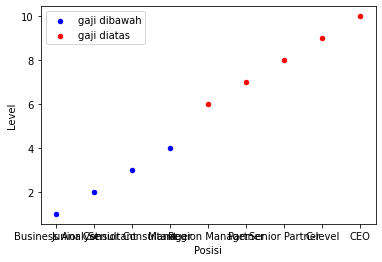

In [8]:
gaji_dibawah_60 = data[(data['Gaji'] < 110000)]
gaji_diatas_60 = data[(data['Gaji'] > 110000)]

axes = gaji_dibawah_60.plot(kind='scatter',x='Posisi', y='Level', color='blue', label='gaji dibawah')
gaji_diatas_60.plot(kind='scatter',x='Posisi', y='Level', color='red', label='gaji diatas', ax=axes)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['Posisi'] = labelencoder.fit_transform(data['Posisi'])
data.head()

,Posisi,Level,Gaji
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000


In [10]:
posisi_bmi = data[(data['Posisi']) == 1 ]
level_dibawah = data[(data['Level'] < 4)]
level_diatas = data[(data['Level'] > 4)]

counta_level = posisi_bmi[(posisi_bmi['Gaji'] > 110000)]
bmi_x_harga_atas_110 = level_diatas[(level_diatas['Gaji'] > 110000)]
bmi_y_harga_atas_110 = level_diatas[(level_diatas['Gaji'] > 110000)]

Paa = bmi_x_harga_atas_110['Level'].count() / counta_level['Level'].count()
Pab = bmi_y_harga_atas_110['Level'].count() / counta_level['Level'].count()

print('mana yang lebih lebih mungkin terjadi')

print('A. C-Level dengan level diatas 4 mendapatkan gaji diatas 110k :', Paa)
print('B. C-Level dengan level dibawah 4 mendapatkan gaji diatas 110k :', Pab)

print('\nJawaban Prediksi ada di Kegiatan 3')

mana yang lebih lebih mungkin terjadi
A. C-Level dengan level diatas 4 mendapatkan gaji diatas 110k : 5.0
B. C-Level dengan level dibawah 4 mendapatkan gaji diatas 110k : 5.0

Jawaban Prediksi ada di Kegiatan 3


In [11]:
def categorise(row):  
    if row['Gaji'] > 110000 :
        return 1
    else:
        return 0

data['categories'] = data.apply(lambda row: categorise(row), axis=1)

In [12]:
def Paa(row):  
    if Paa == 1 :
      return 1
    else:
      return 0
data['Paa'] = data.apply(lambda row: Paa(row), axis=1)

In [13]:
def Pab(row):  
    if Pab == 0 :
      return 0
    else:
      return 1
data['Pab'] = data.apply(lambda row: Pab(row), axis=1)

In [15]:
#deklarasi training dan testing data
X_train = data[['categories', 'Paa']]
y_train = data['Gaji']

X_test = data[['categories', 'Pab']]
y_test = y_train

In [16]:
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       45000       0.00      0.00      0.00         1
       50000       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         1
      110000       0.20      1.00      0.33         1
      150000       0.00      0.00      0.00         1
      200000       0.00      0.00      0.00         1
      300000       0.00      0.00      0.00         1
      500000       0.00      0.00      0.00         1
     1000000       0.20      1.00      0.33         1

    accuracy                           0.20        10
   macro avg       0.04      0.20      0.07        10
weighted avg       0.04      0.20      0.07        10



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pab
Feature names seen at fit time, yet now missing:
- Paa

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics

Text(192.66000000000003, 0.5, 'Predicted label')

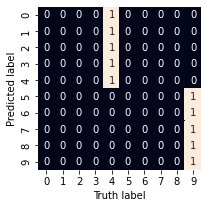

In [17]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)
 
#membuat plotting confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
plt.figure (figsize=(8,3))
sns.heatmap(cm, annot=True,square=True,fmt='d',cbar=False)
plt.xlabel('Truth label')
plt.ylabel('Predicted label')

In [18]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_test)

SVC(C=10000000000.0, kernel='linear')

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  gaji_dibawah_60 = data[(data['Gaji'] < 110000)]
  gaji_diatas_60 = data[(data['Gaji'] > 110000)]

  axes = gaji_dibawah_60.plot(kind='scatter',x='Posisi', y='Level', color='blue', label='gaji dibawah')
  gaji_diatas_60.plot(kind='scatter',x='Posisi', y='Level', color='red', label='gaji diatas', ax=axes)
  

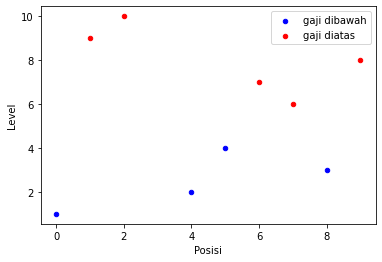

In [22]:
# plt.scatter(X_train, X_test, c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(model);